## Implementing FVSBNs


In [5]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader


In [6]:
import torchvision

In [7]:
#Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [8]:
#Define the FVSBN model
class FVSBN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(FVSBN, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim, input_dim)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.sigmoid(self.input_layer(x))
        return self.sigmoid(self.hidden_layer(x))


In [ ]:
#Initialize the FVSBN model
model = FVSBN(784, 512) #adjust
#Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
#Train the model
for epoch in range(10):
    print(epoch)
    for images, _ in train_loader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        images = images / 2 + 0.5
        loss = criterion(output, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
#Generate new images
with torch.no_grad():
    new_images = model(torch.randn(64, 784))

0


1
2
3
4
5
6
7
8
9


In [ ]:
#Train the model
for epoch in range(30):
    print(epoch+1)
    for images, _ in train_loader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        images = images / 2 + 0.5
        loss = criterion(output, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [ ]:
#Train the model
for epoch in range(20):
    print(epoch+1)
    for images, _ in train_loader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        images = images / 2 + 0.5
        loss = criterion(output, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [13]:
#Train the model
for epoch in range(10):
    print(epoch+1)
    for images, _ in train_loader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        images = images / 2 + 0.5
        loss = criterion(output, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

1


2
3
4
5
6
7
8
9
10


In [14]:
#Generate new images
with torch.no_grad():
    new_images = model(torch.randn(64, 784))

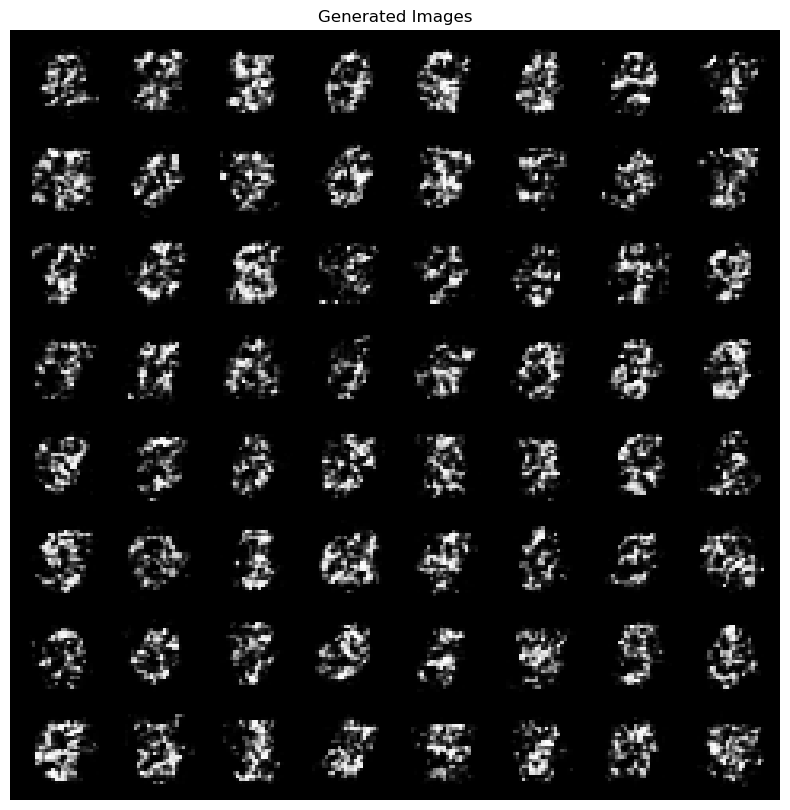

In [17]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Set the model to evaluation mode
model.eval()

# Generate new images
with torch.no_grad():
    new_images = model(torch.randn(64, 784))

# Reshape the generated images for plotting
new_images = new_images.view(-1, 1, 28, 28)

# Create a grid of images
image_grid = vutils.make_grid(new_images, nrow=8, normalize=True)

# Plot the generated images
plt.figure(figsize=(10, 10))
plt.imshow(image_grid.permute(1, 2, 0), cmap='gray')
plt.title('Generated Images')
plt.axis('off')
plt.show()
